# Calculate the equilibrium FX using VEC and comment all your results. You may use the Behavioral Equilibrium Exchange Rate (BEER) approach

In this part, we'll calculate the equilibrium FX of Singapore dollar/U.S. dollar using VEC and BEER approach

## Behavioral Equilibrium Exchange Rate (BEER)

The BEER model was developed by Clark and MacDonald (1999) and estimates the fair value of currencies according to short, medium and long-run determinants. An important concept is that there is no prior theory for the choice of economic variables; hence, the choice of variables is based on economic intuition and data simplicity and availability.   

The reduced-form equation proposed by Clark and MacDonald can be written as followed:
\begin{equation}
e_{t}=\beta_{1}^{\prime} Z_{1, t}+\beta_{2}^{\prime} Z_{2, t}+\tau^{\prime} T_{t}+\epsilon_{t}
\end{equation}
where:    
- $Z_{1}$ and $Z_{2}$ are vectors of economic fundamentals that are expected to have effect on the exchange rate over the medium and long term respectively
- $β_{1}$ and $β_{2}$ are vectors of reduced-form coefficients
- T is a vector of transitory factors affecting the real exchange rate in the short run
- τ is a vector of reduced form coefficients
- ε is the noise    

As we are interested in modelling the medium-to-long run valuation of currencies, we can skip the transitory matrix T.     

## Macroeconomic Variables and Data Used

The choice of macroeconomic variables that are expected to affect the exchange rate in addition to explaining the economic intuition. For our study and the frequency of the data, we chose to use the following macroeconomic variables:    

- (GDP)  GDP Per Capita Ratio
- (IR)  Real Interest Rate Differential
- (CPI)  CPI Ratio   
- (FA)  Net Foreign Asset Holding Ratio
- (CA)  Current Account Balance Gap     

FX: USD/SGD 

Time period: 1960-2017     

Data source: World Bank national accounts data, and OECD National Accounts data files.

In [13]:
library(tseries)
library(vars)
library(tsDyn)
library(urca)
library(readxl) 

In [44]:
m <- read_excel("data_agr.xlsx")
m <- na.omit(m)
head(m)

USDSGD,GDP Per Capita Ratio,Interest Rate Differential,CPI Ratio,Net Foreign Asset Holding Ratio,Current Acc Balance Gap
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.0612,7.0250,-1.2432,0.4929,11.4955,17.7752
3.0612,6.8275,-1.2861,0.4962,10.7528,17.7752
3.0612,6.8713,-1.3500,0.5000,9.4013,17.7752
3.0612,6.6011,-1.1807,0.4953,8.5396,17.7752
3.0612,7.3608,-1.0264,0.4931,7.7777,17.7752
3.0612,7.4100,-1.0598,0.5000,6.3506,17.7752


## ADF test
The commonly accepted Augmented Dickey-Fuller (ADF) unit root test are adopted to stationary test of FX, GDP, IR, CPI, FA and CA. The test results are shown below:

In [45]:
apply(m,2,adf.test)

$USDSGD

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -1.9166, Lag order = 3, p-value = 0.6083
alternative hypothesis: stationary


$`GDP Per Capita Ratio`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -1.3937, Lag order = 3, p-value = 0.8195
alternative hypothesis: stationary


$`Interest Rate Differential`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -3.4823, Lag order = 3, p-value = 0.05169
alternative hypothesis: stationary


$`CPI Ratio`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -2.0756, Lag order = 3, p-value = 0.5441
alternative hypothesis: stationary


$`Net Foreign Asset Holding Ratio`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -2.8895, Lag order = 3, p-value = 0.2156
alternative hypothesis: stationary


$`Current Acc Balance Gap`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -0.87533, Lag order = 3, p-value = 0.9498
alternative hypothesis: stationary



The test results above show that level value of the 6 series is nonstationary, and further test indicates that all 6 variables are first-order difference stationary as shown below:

In [78]:
apply(diff(as.matrix(m)),2,adf.test)

Warning message in FUN(newX[, i], ...):
“p-value smaller than printed p-value”
Warning message in FUN(newX[, i], ...):
“p-value smaller than printed p-value”


$USDSGD

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -3.566, Lag order = 3, p-value = 0.04395
alternative hypothesis: stationary


$`GDP Per Capita Ratio`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -4.3492, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


$`Interest Rate Differential`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -5.7101, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


$`CPI Ratio`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -3.6169, Lag order = 3, p-value = 0.03968
alternative hypothesis: stationary


$`Net Foreign Asset Holding Ratio`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -3.9288, Lag order = 3, p-value = 0.01904
alternative hypothesis: stationary


$`Current Acc Balance Gap`

	Augmented Dickey-Fuller Test

data:  newX[, i]
Dickey-Fuller = -3.8995, Lag order = 3, p-value = 0.02031
alternative hypothesis: stationary



This is a necessary condition of applying cointegration analysis that the series should should be non-stationary at levels or should not be I(0) and have the same order of integration, in our case all variables are I(1).

## Estimation of VAR Model
We need to first estimate a VAR Model to select the optimal number of lags.

In [53]:
VAR_model <- VAR(m, lag.max = 24, type = "none",ic="AIC")
summary(VAR_model)


VAR Estimation Results:
Endogenous variables: USDSGD, GDP.Per.Capita.Ratio, Interest.Rate.Differential, CPI.Ratio, Net.Foreign.Asset.Holding.Ratio, Current.Acc.Balance.Gap 
Deterministic variables: none 
Sample size: 53 
Log Likelihood: 67.864 
Roots of the characteristic polynomial:
1.003 0.9529 0.9235 0.9235 0.894 0.894 0.8921 0.8921 0.8784 0.8784 0.8666 0.8666 0.8583 0.8583 0.8147 0.8147 0.8076 0.8076 0.7919 0.7919 0.7878 0.7878 0.7577 0.7443 0.7443 0.6424 0.6175 0.6175 0.598 0.408
Call:
VAR(y = m, type = "none", lag.max = 24, ic = "AIC")


Estimation results for equation USDSGD: 
USDSGD = USDSGD.l1 + GDP.Per.Capita.Ratio.l1 + Interest.Rate.Differential.l1 + CPI.Ratio.l1 + Net.Foreign.Asset.Holding.Ratio.l1 + Current.Acc.Balance.Gap.l1 + USDSGD.l2 + GDP.Per.Capita.Ratio.l2 + Interest.Rate.Differential.l2 + CPI.Ratio.l2 + Net.Foreign.Asset.Holding.Ratio.l2 + Current.Acc.Balance.Gap.l2 + USDSGD.l3 + GDP.Per.Capita.Ratio.l3 + Interest.Rate.Differential.l3 + CPI.Ratio.l3 + Net.Foreign.

In [56]:
VARselect(data.matrix(m),lag.max = 24)

,1,2,3,4,5,6,7,8,9,10,⋯,15,16,17,18,19,20,21,22,23,24
AIC(n),-1.613185e+01,-1.609370e+01,-1.658778e+01,-2.037261e+01,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,⋯,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf
HQ(n),-1.548884e+01,-1.489954e+01,-1.484247e+01,-1.807614e+01,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,⋯,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf
SC(n),-1.424635e+01,-1.259205e+01,-1.146999e+01,-1.363867e+01,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,⋯,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf
FPE(n),1.022314e-07,1.309851e-07,1.488667e-07,1.659340e-08,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Using the Akaike Information Criterion to select the lag length of 5

### impulse response functions

### error variance decomposition

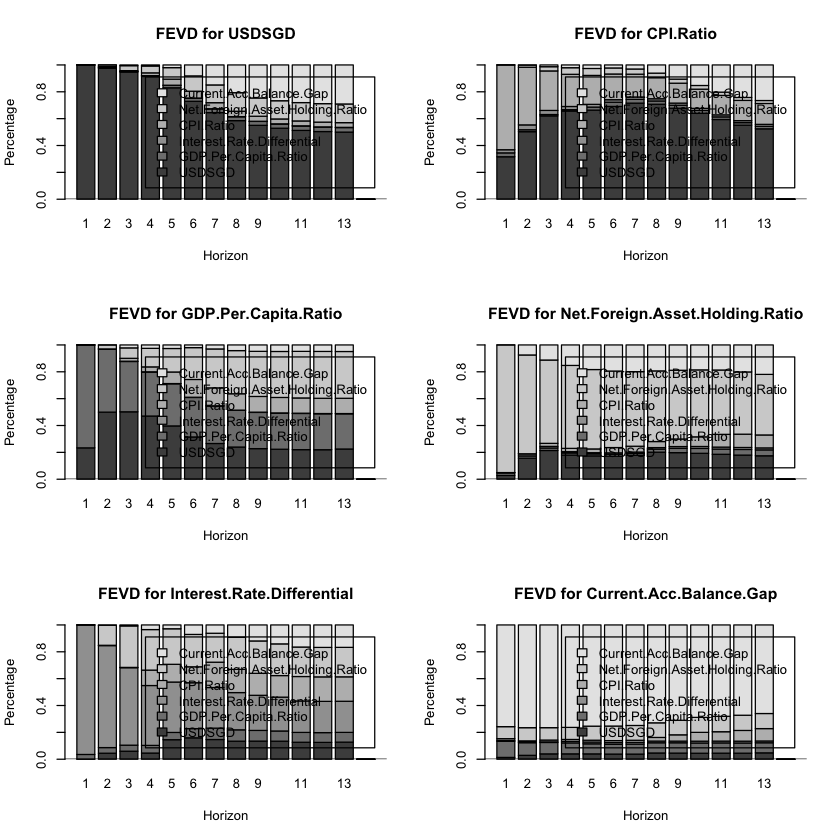

In [61]:
# compute and plot the forecast error variance decomposition
VAR_fevd <- fevd(VAR_model,n.ahead = 13)
plot(VAR_fevd)

### residual analysis

In [62]:
# obtain residuals:
resids  = residuals(VAR_model)
head(resids)

,USDSGD,GDP.Per.Capita.Ratio,Interest.Rate.Differential,CPI.Ratio,Net.Foreign.Asset.Holding.Ratio,Current.Acc.Balance.Gap
1,0.003379742,0.096747383,0.3202133,0.004948981,1.21735269,-1.56258564
2,0.058979064,0.111086289,-0.3360151,0.005897498,0.05405912,1.01081271
3,-0.063092006,-0.087866665,-0.2823937,-0.009798499,-1.28829955,-1.78654569
4,-0.052119915,0.007654418,0.2561114,-0.010481790,0.29213731,-1.47831251
5,0.040761171,-0.091062618,0.2434458,0.008345402,-1.92013839,0.03392265
6,0.082970254,-0.010647509,0.7354406,0.017975038,1.94817081,2.11514046


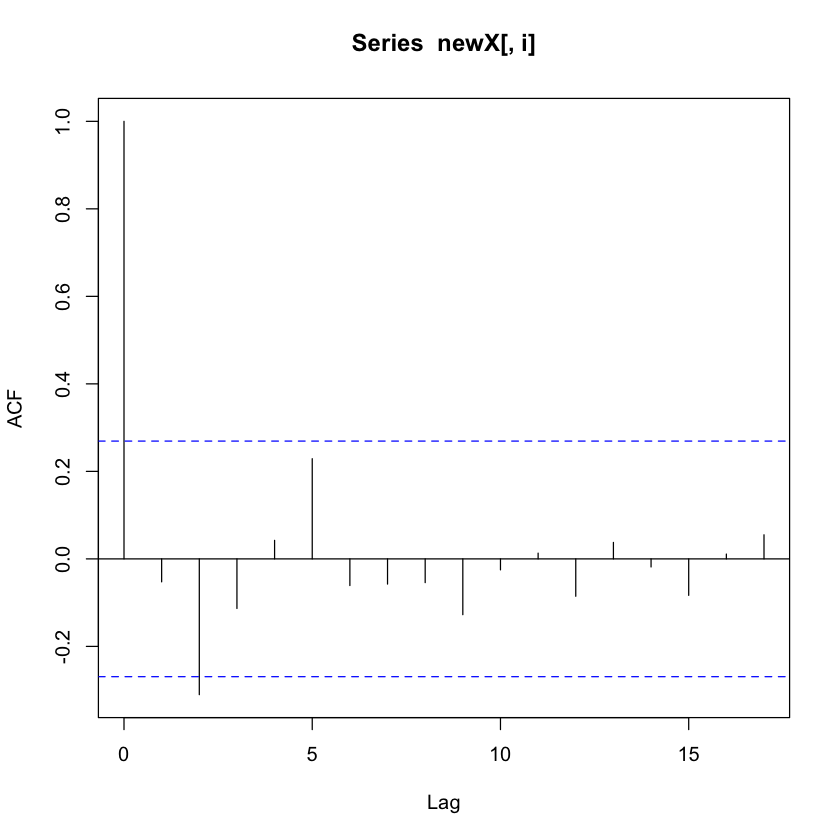

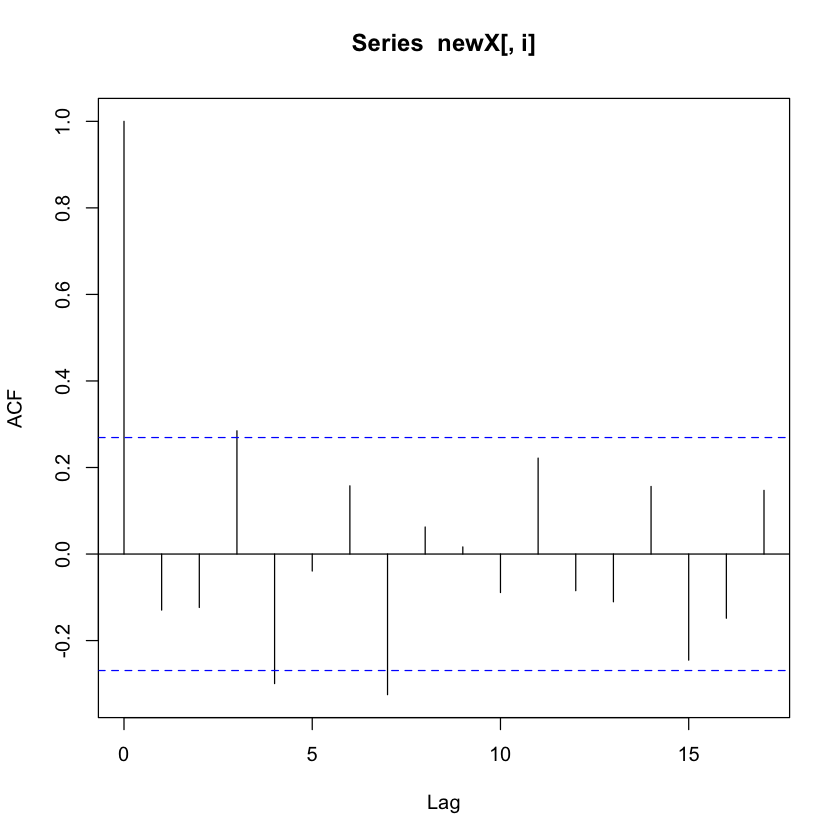

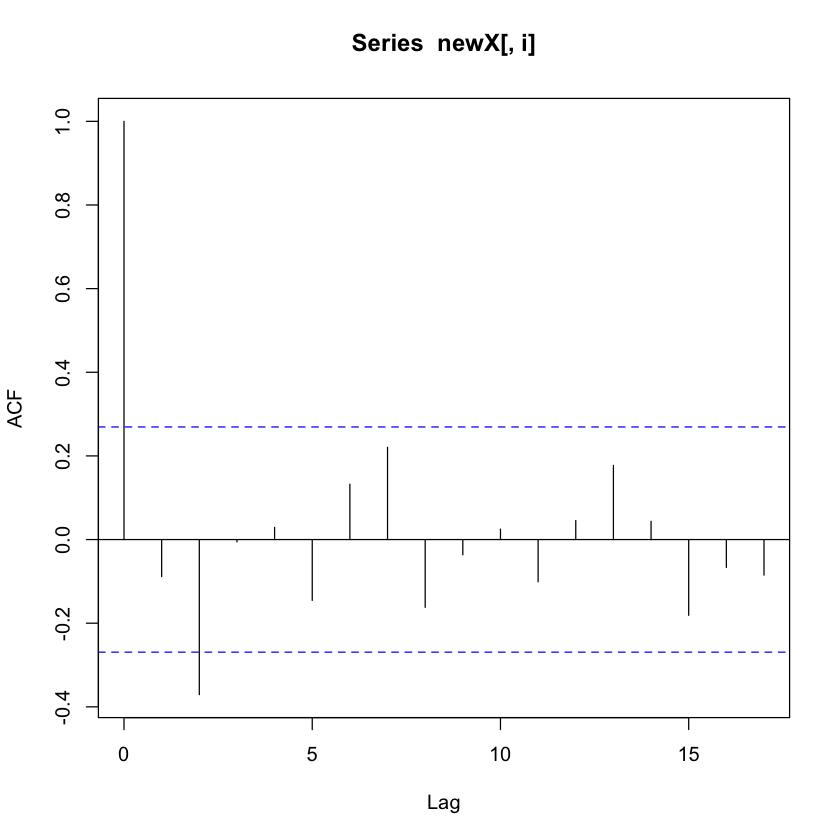

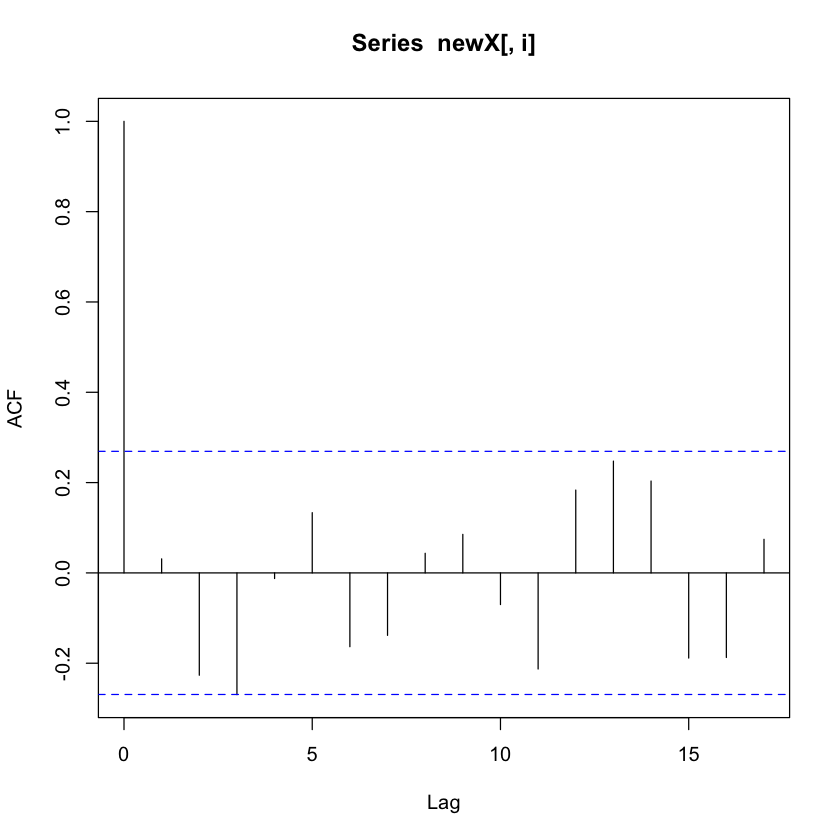

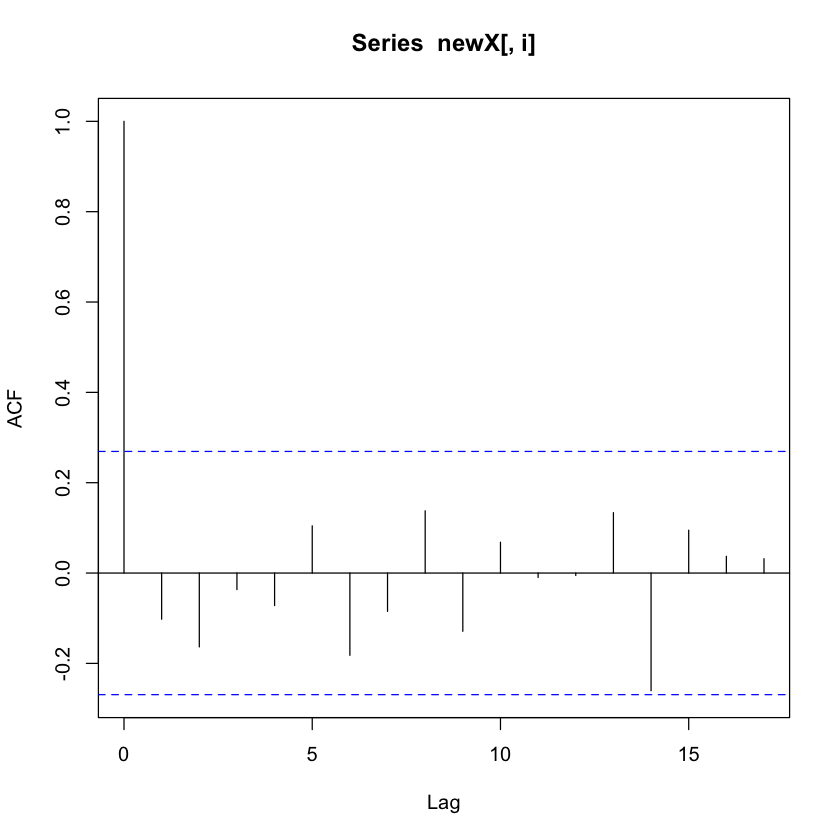

$USDSGD

Autocorrelations of series ‘newX[, i]’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.052 -0.310 -0.113  0.042  0.229 -0.061 -0.058 -0.054 -0.127 -0.025 
    11     12     13     14     15     16     17 
 0.013 -0.085  0.038 -0.018 -0.083  0.011  0.055 

$GDP.Per.Capita.Ratio

Autocorrelations of series ‘newX[, i]’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.129 -0.123  0.285 -0.299 -0.039  0.158 -0.325  0.062  0.016 -0.089 
    11     12     13     14     15     16     17 
 0.222 -0.085 -0.110  0.156 -0.245 -0.148  0.147 

$Interest.Rate.Differential

Autocorrelations of series ‘newX[, i]’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.089 -0.371 -0.006  0.029 -0.145  0.132  0.221 -0.162 -0.036  0.025 
    11     12     13     14     15     16     17 
-0.101  0.045  0.177  0.044 -0.181 -0.067 -0.085 

$CPI.Ratio

Autocorrelat

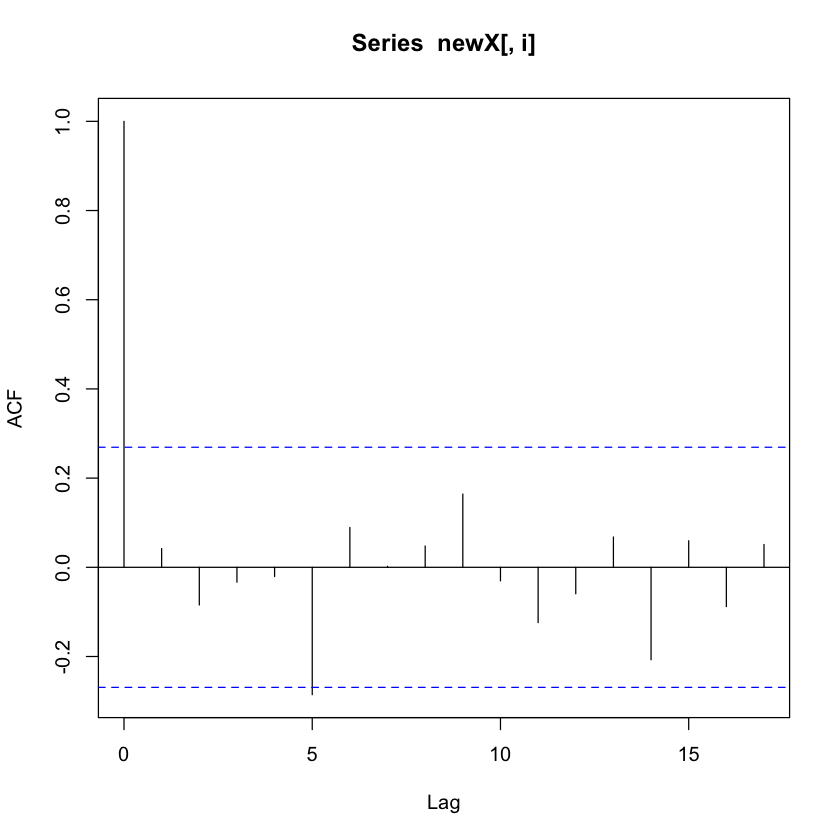

In [63]:
apply(resids,2,acf)

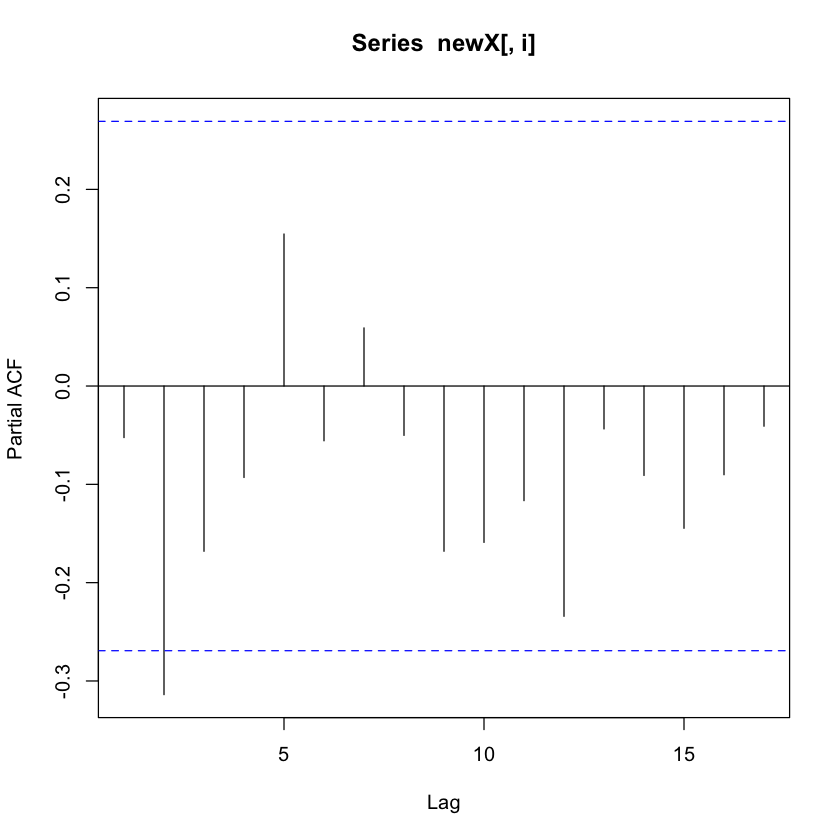

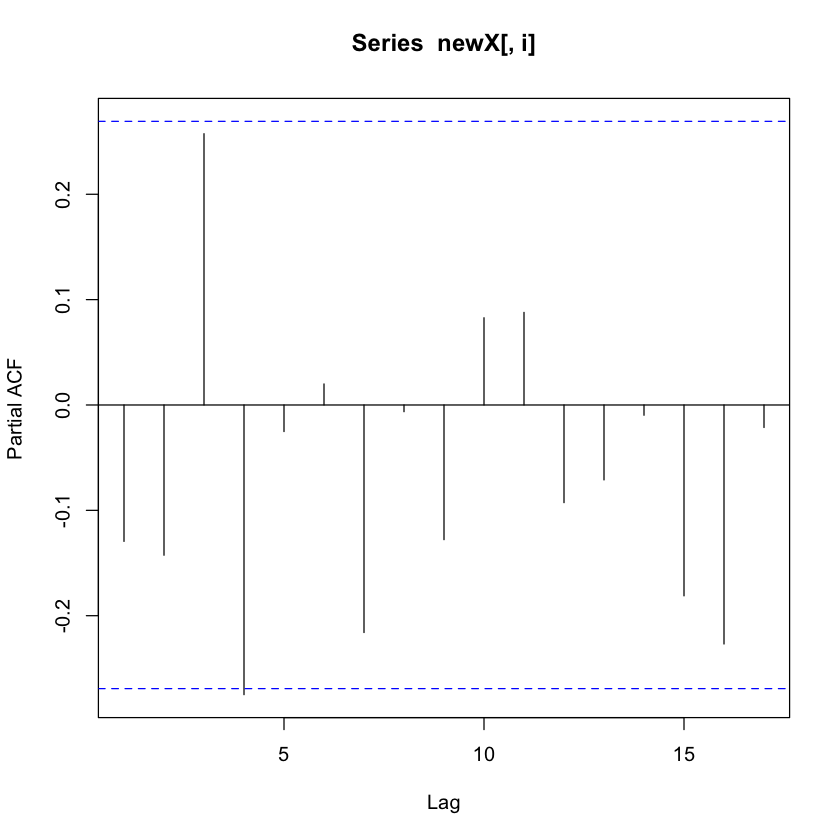

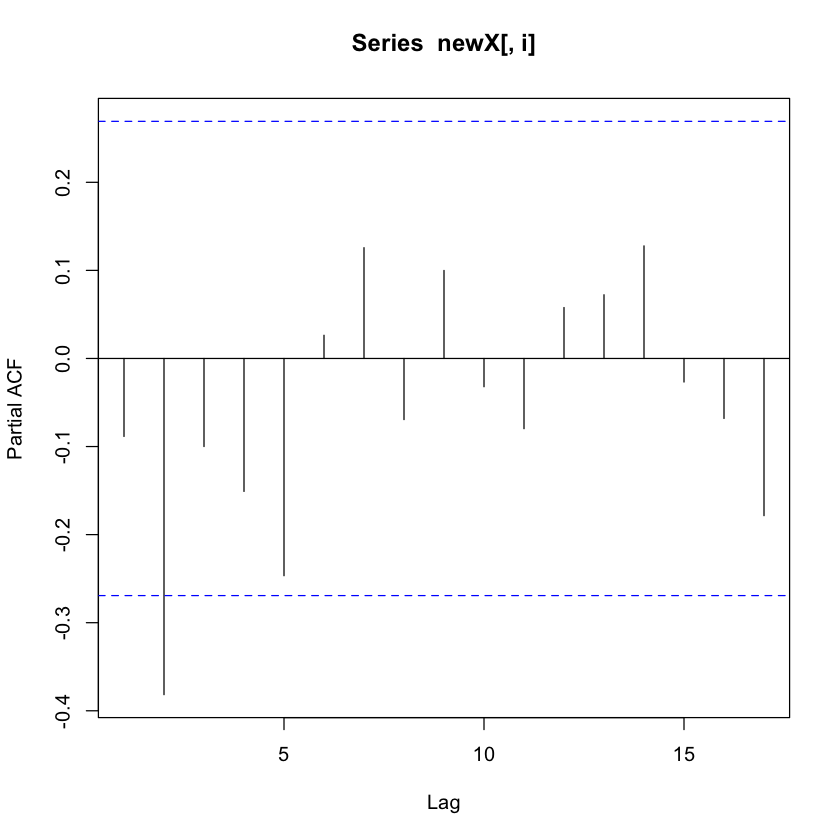

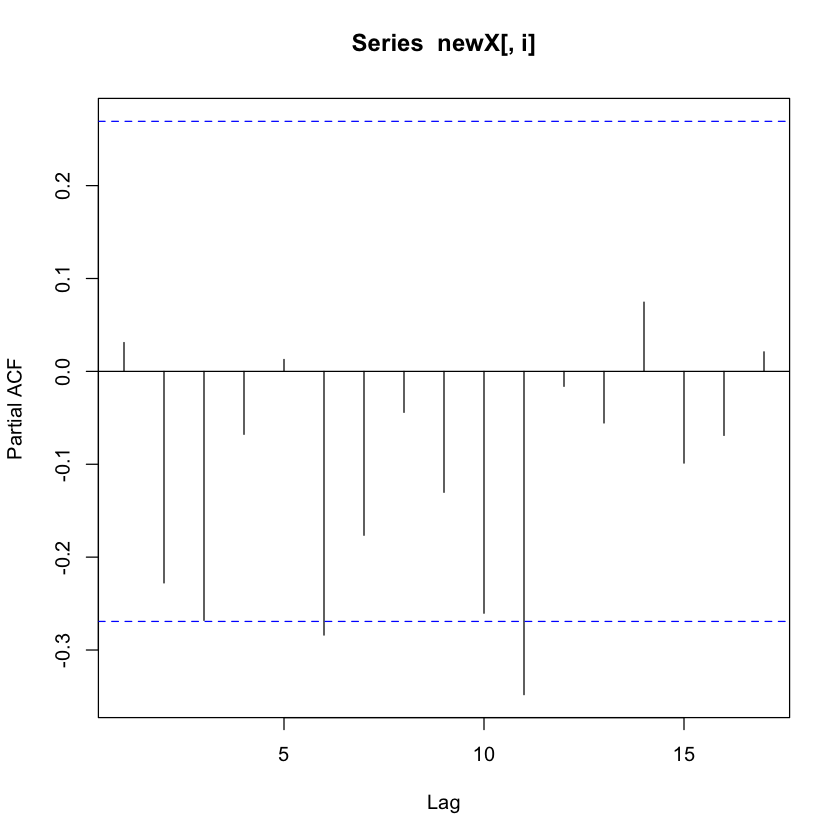

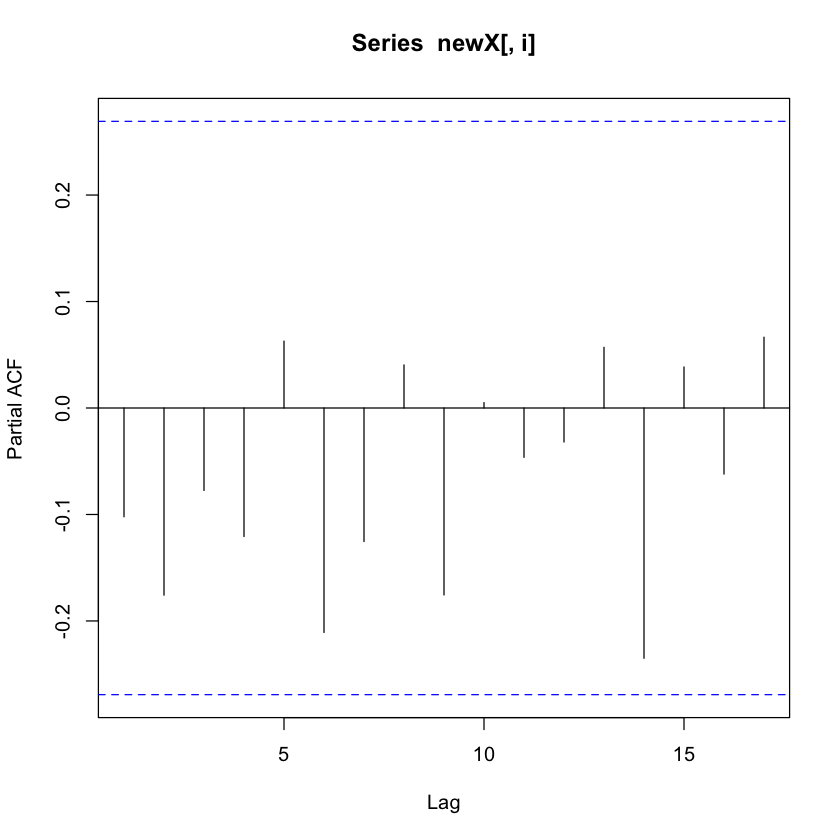

$USDSGD

Partial autocorrelations of series ‘newX[, i]’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.052 -0.314 -0.168 -0.093  0.155 -0.056  0.059 -0.050 -0.168 -0.159 -0.117 
    12     13     14     15     16     17 
-0.234 -0.044 -0.091 -0.145 -0.090 -0.041 

$GDP.Per.Capita.Ratio

Partial autocorrelations of series ‘newX[, i]’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.129 -0.143  0.257 -0.275 -0.025  0.020 -0.216 -0.006 -0.128  0.083  0.088 
    12     13     14     15     16     17 
-0.093 -0.071 -0.010 -0.181 -0.227 -0.021 

$Interest.Rate.Differential

Partial autocorrelations of series ‘newX[, i]’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.089 -0.382 -0.100 -0.151 -0.247  0.026  0.126 -0.069  0.100 -0.032 -0.080 
    12     13     14     15     16     17 
 0.058  0.072  0.128 -0.027 -0.068 -0.178 

$CPI.Ratio

Partial autocorrelations of se

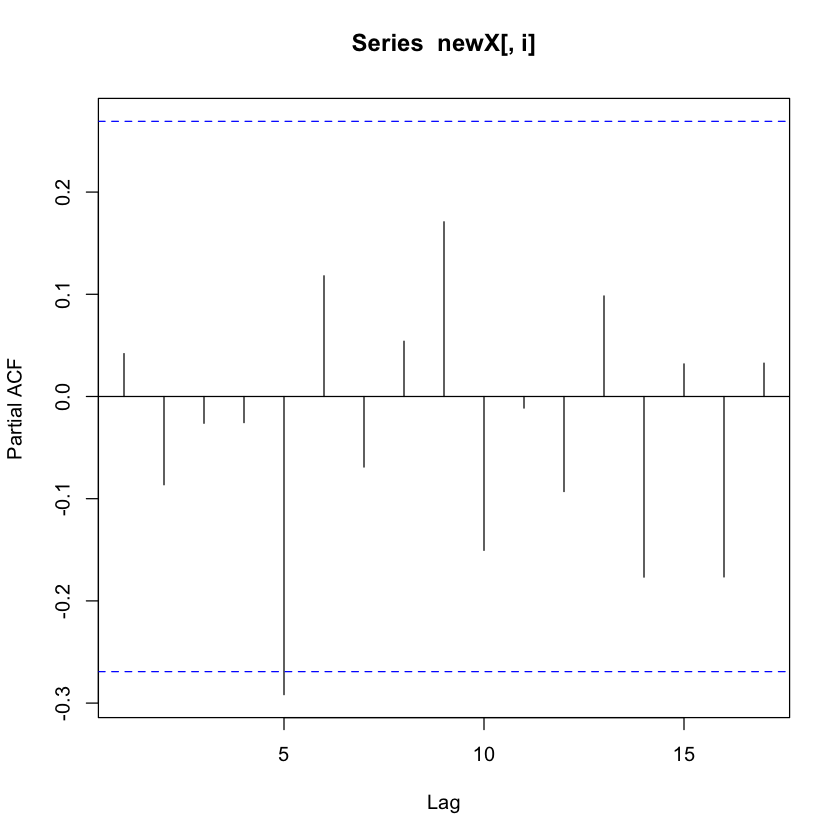

In [64]:
apply(resids,2,pacf)

auto-correlations and partial autocorrelations of the residuals are all comfortably insignificant.    

## Johansen Cointegration tests

In [66]:
m1=ca.jo(m,ecdet="const",type="trace",K=5)
summary(m1)

m2=ca.jo(m,ecdet="const",type="eigen",K=5)
summary(m2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 8.190398e-01 6.757592e-01 4.931794e-01 2.756218e-01 2.571337e-01
[6] 1.506434e-01 1.110223e-16

Values of teststatistic and critical values of test:

           test 10pct   5pct   1pct
r <= 5 |   8.65  7.52   9.24  12.97
r <= 4 |  24.41 17.85  19.96  24.60
r <= 3 |  41.50 32.00  34.91  41.07
r <= 2 |  77.52 49.65  53.12  60.16
r <= 1 | 137.21 71.86  76.07  84.45
r = 0  | 227.81 97.18 102.14 111.01

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                                       USDSGD.l5 GDP.Per.Capita.Ratio.l5
USDSGD.l5                            1.000000000              1.00000000
GDP.Per.Capita.Ratio.l5              0.072123649             -0.22778514
Interest.Rate.Differential.l5        0.472736235              0.02164489
CPI.Ratio.l5                        12.8


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 8.190398e-01 6.757592e-01 4.931794e-01 2.756218e-01 2.571337e-01
[6] 1.506434e-01 1.110223e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 5 |  8.65  7.52  9.24 12.97
r <= 4 | 15.75 13.75 15.67 20.20
r <= 3 | 17.09 19.77 22.00 26.81
r <= 2 | 36.02 25.56 28.14 33.24
r <= 1 | 59.69 31.66 34.40 39.79
r = 0  | 90.60 37.45 40.30 46.82

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                                       USDSGD.l5 GDP.Per.Capita.Ratio.l5
USDSGD.l5                            1.000000000              1.00000000
GDP.Per.Capita.Ratio.l5              0.072123649             -0.22778514
Interest.Rate.Differential.l5        0.472736235              0.02164489
CPI.Ratio.l5                       

Johansen cointegration test on FX, GDP, IR, CPI, FA and CA shows contradicting results: maximum eigenvalue test rejects the null of no co-integrating relationship but we cannot reject there is 3 co-integrating factors, while trace test rejects the null hypothesis of 3 cointegrating relationships. This means there are stable and long-term equilibrium relationships among the variables. 

## VECM Estimation and Analysis

In [69]:
m3 <- VECM(m,lag=5,r=2,estim="ML")
summary(m3)

#############
###Model VECM 
#############
Full sample size: 58 	End sample size: 52
Number of variables: 6 	Number of estimated slope parameters 198
AIC -734.3095 	BIC -332.3533 	SSR 286.5606
Cointegrating vector (estimated by ML):
   USDSGD GDP Per Capita Ratio Interest Rate Differential CPI Ratio
r1      1                    0                  0.2737700  14.19793
r2      0                    1                  0.9214425  45.90835
   Net Foreign Asset Holding Ratio Current Acc Balance Gap
r1                     -0.07487734               0.1536760
r2                     -0.18463526               0.5126358


                                         ECT1                
Equation USDSGD                          -0.6108(0.2554)*    
Equation GDP Per Capita Ratio            0.1512(0.4010)      
Equation Interest Rate Differential      -2.1615(6.3295)     
Equation CPI Ratio                       -0.0097(0.0475)     
Equation Net Foreign Asset Holding Ratio -5.4939(3.2319)     
Equation Cur

In [77]:
cajorls(m2, r = 3)

$rlm

Call:
lm(formula = substitute(form1), data = data.mat)

Coefficients:
                                     USDSGD.d    GDP.Per.Capita.Ratio.d
ect1                                 -3.878e-01  -1.757e-03            
ect2                                  8.285e-02   6.113e-03            
ect3                                 -1.274e-02   2.304e-02            
USDSGD.dl1                            3.884e-01   1.096e+00            
GDP.Per.Capita.Ratio.dl1             -1.065e-01   1.017e-01            
Interest.Rate.Differential.dl1       -2.235e-03  -2.696e-03            
CPI.Ratio.dl1                        -2.361e+00   4.925e-01            
Net.Foreign.Asset.Holding.Ratio.dl1   1.317e-02   2.995e-02            
Current.Acc.Balance.Gap.dl1          -7.683e-03  -2.814e-03            
USDSGD.dl2                           -1.649e-01  -1.820e-01            
GDP.Per.Capita.Ratio.dl2             -1.210e-01  -5.050e-02            
Interest.Rate.Differential.dl2       -9.834e-03   6.712e-03 

## JYP/USD vs JYP/USD BEER

In [79]:
frcastvecm <- predict(m3)
frcastvecm

summary(frcastvecm)

,USDSGD,GDP Per Capita Ratio,Interest Rate Differential,CPI Ratio,Net Foreign Asset Holding Ratio,Current Acc Balance Gap
59,1.379980,0.8146993,-5.093655,0.9990526,-1.228641,-20.40467
60,1.284272,0.7263575,-4.406436,0.9948214,-1.997385,-19.86031
61,1.269327,0.4797358,-1.003552,0.9924637,-2.296151,-19.26031
62,1.250042,0.2964943,-1.667779,1.0030244,-2.010936,-20.77310
63,1.197081,0.2420096,-1.167446,1.0160280,-1.065524,-23.37401


     USDSGD      GDP Per Capita Ratio Interest Rate Differential
 Min.   :1.197   Min.   :0.2420       Min.   :-5.094            
 1st Qu.:1.250   1st Qu.:0.2965       1st Qu.:-4.406            
 Median :1.269   Median :0.4797       Median :-1.668            
 Mean   :1.276   Mean   :0.5119       Mean   :-2.668            
 3rd Qu.:1.284   3rd Qu.:0.7264       3rd Qu.:-1.167            
 Max.   :1.380   Max.   :0.8147       Max.   :-1.004            
   CPI Ratio      Net Foreign Asset Holding Ratio Current Acc Balance Gap
 Min.   :0.9925   Min.   :-2.296                  Min.   :-23.37         
 1st Qu.:0.9948   1st Qu.:-2.011                  1st Qu.:-20.77         
 Median :0.9991   Median :-1.997                  Median :-20.40         
 Mean   :1.0011   Mean   :-1.720                  Mean   :-20.73         
 3rd Qu.:1.0030   3rd Qu.:-1.229                  3rd Qu.:-19.86         
 Max.   :1.0160   Max.   :-1.066                  Max.   :-19.26         